In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
%matplotlib inline

**Normal Implementation which uses element-wise multiplication with image pixel and kernel**

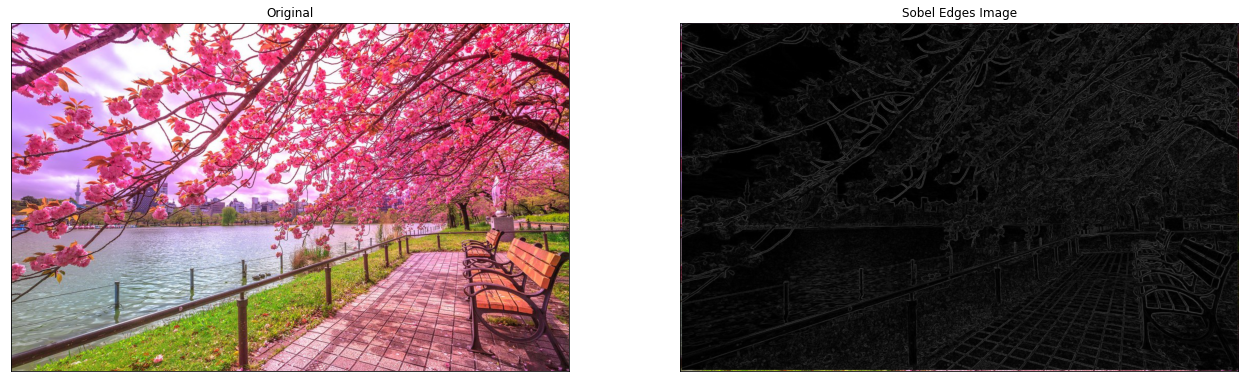

In [47]:
img = plt.imread('place.jpg')
# print(img)

x_filter = [[1,0,-1], [2,0,-2], [1,0,-1]]

y_filter = [[1,2,1], [0,0,0], [-1,-2,-1]]

new_img = img.copy()

n, m, d = img.shape
# print(n, m)

for i in range(3, n - 2):
  for j in range(3, m - 2):
    # 3x3 matrix
    matrix = img[i-1:i+2,j-1:j+2,0]
    dy_temp = y_filter*matrix
    dy=dy_temp.sum() / 9

    dx_temp = x_filter * matrix
    dx = dx_temp.sum() / 9

    val = math.sqrt(dx*dx + dy * dy)
    
    new_img[i,j] = val

new_img = new_img / new_img.max()
# plt.imshow(new_img)
# plt.show()
plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_img)
plt.title("Sobel Edges Image")
plt.xticks([])
plt.yticks([])
plt.show()

**Gradient Magnitude which uses for scipy signal function convolution**

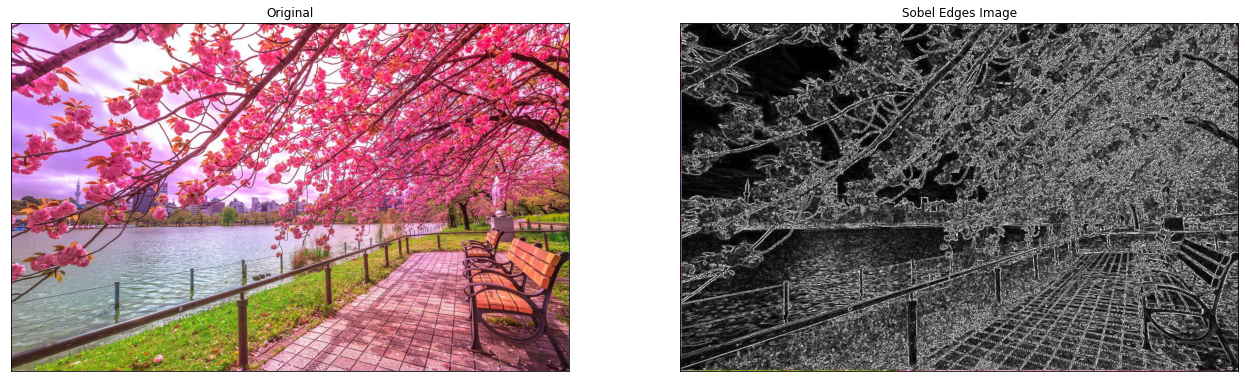

In [46]:
img = plt.imread('place.jpg')
# print(img)

x_filter = [[1,0,-1], [2,0,-2], [1,0,-1]]

y_filter = [[1,2,1], [0,0,0], [-1,-2,-1]]

new_img = img.copy()

n, m, d = img.shape
# print(n, m)

for i in range(3, n - 2):
  for j in range(3, m - 2):
    # 3x3 matrix
    matrix = img[i-1:i+2,j-1:j+2,0]
    dy_temp = signal.convolve2d(matrix, y_filter, mode='same', boundary='symm')
    dy=dy_temp.sum() / 9

    dx_temp = signal.convolve2d(matrix, x_filter, mode='same', boundary='symm')
    dx = dx_temp.sum() / 9

    val = math.sqrt(dx*dx + dy * dy)
    
    new_img[i,j] = val

new_img = new_img / new_img.max()
# plt.imshow(new_img)
# plt.show()
plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_img)
plt.title("Sobel Edges Image")
plt.xticks([])
plt.yticks([])
plt.show()

**Two Dimension Convolution Function**

In [0]:
def two_dimensional_convolution(x, h):
  """
  x is input
  h is kernel
  """
  # print("Hello")

  kernel_row = len(h)
  kernel_col = len(h[0])
  kernel_center_X = int(kernel_col / 2)
  kernel_center_Y = int(kernel_row / 2)
  # print(kernel_row, kernel_col, kernel_center_X, kernel_center_Y)
  row = len(x)
  col = len(x[0])
  output = np.zeros((row, col), dtype=int)
  # print(output)
  for i in range(0, row):
    for j in range(0, col):
      for m in range(0, kernel_row):
        mm = kernel_row - 1 - m
        for n in range(0, kernel_col):
          nn = kernel_col - 1 - n
          ii = i + (kernel_center_Y - mm)
          jj = j + (kernel_center_X - nn)
          if(ii >= 0 and ii < row and jj >= 0 and jj < col):
            output[i][j] += x[ii][jj] * h[mm][nn]
    
  # print(output)

  return output


**Two Dimension Convolution Test**

In [33]:
x=[[1, 2, 3], [4, 5, 6], [7, 8, 9]]signal.convolve2d
h=[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
output = two_dimensional_convolution(x, h)
print(output)

[[-13 -20 -17]
 [-18 -24 -18]
 [ 13  20  17]]


**Normalized x-gradient (X directional filtering edges)**


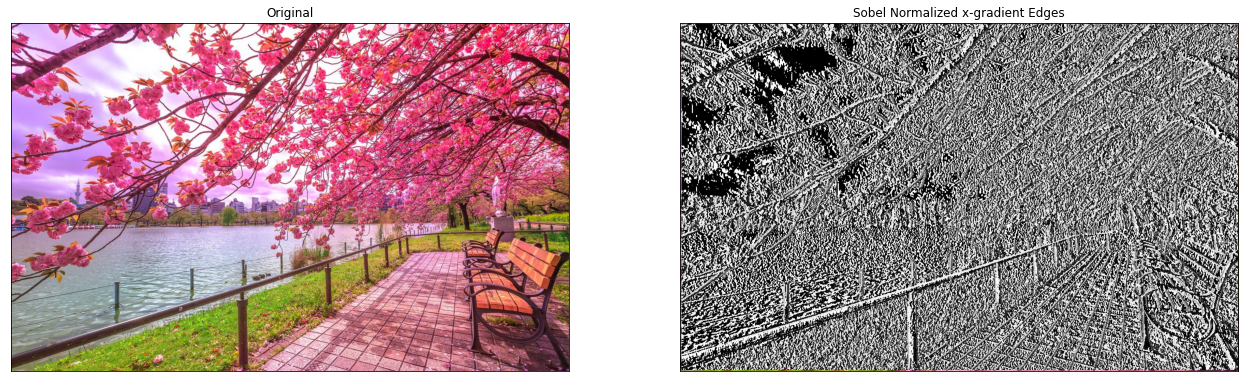

In [39]:
img = plt.imread('place.jpg')
# print(img)

x_filter = [[1,0,-1], [2,0,-2], [1,0,-1]]

y_filter = [[1,2,1], [0,0,0], [-1,-2,-1]]

new_img = img.copy()

n, m, d = img.shape
# print(n, m)

for i in range(3, n - 2):
  # print(i)
  for j in range(3, m - 2):
    # 3x3 matrix
    matrix = img[i-1:i+2,j-1:j+2,0]
    dx_temp = two_dimensional_convolution(matrix, x_filter)
    dx = dx_temp.sum() / 9
    new_img[i,j] = dx

new_img = new_img / new_img.max()
# plt.imshow(new_img)
# plt.show()
plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_img)
plt.title("Sobel Normalized x-gradient Edges")
plt.xticks([])
plt.yticks([])
plt.show()

**Normalized y-gradient (Y directional filtering edges)**

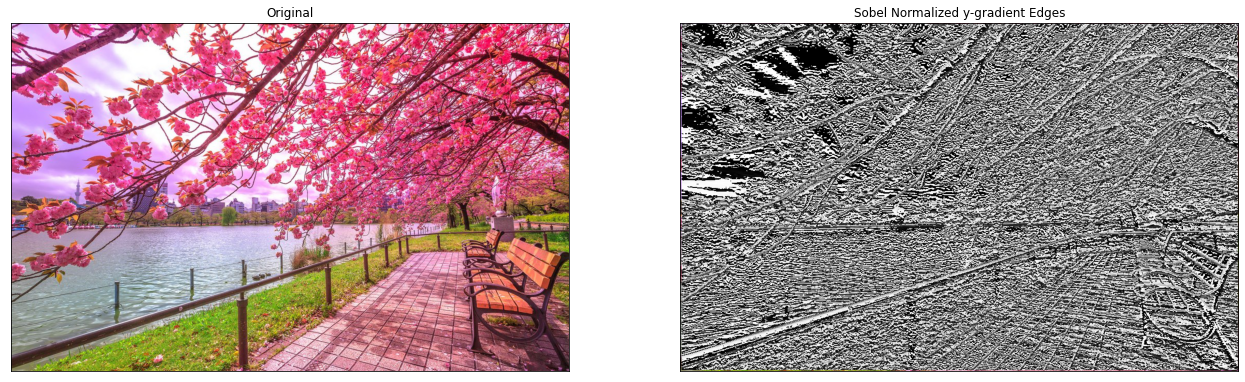

In [40]:
img = plt.imread('place.jpg')
# print(img)

x_filter = [[1,0,-1], [2,0,-2], [1,0,-1]]

y_filter = [[1,2,1], [0,0,0], [-1,-2,-1]]

new_img = img.copy()

n, m, d = img.shape
# print(n, m)

for i in range(3, n - 2):
  # print(i)
  for j in range(3, m - 2):
    # 3x3 matrix
    matrix = img[i-1:i+2,j-1:j+2,0]
    dy_temp = two_dimensional_convolution(matrix, y_filter)
    dy = dy_temp.sum() / 9
    new_img[i,j] = dy

new_img = new_img / new_img.max()
# plt.imshow(new_img)
# plt.show()
plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_img)
plt.title("Sobel Normalized y-gradient Edges")
plt.xticks([])
plt.yticks([])
plt.show()

**Normalized gradient magnitude for both direction**

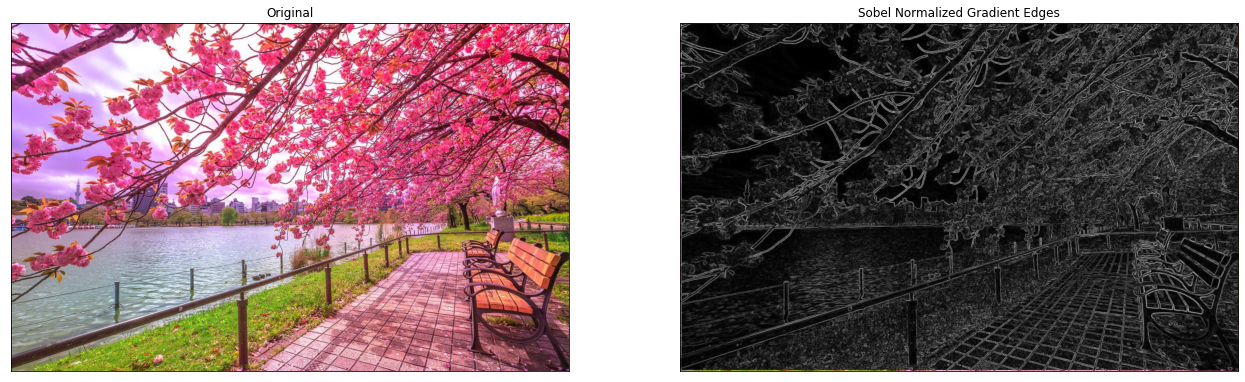

In [41]:
img = plt.imread('place.jpg')
# print(img)

x_filter = [[1,0,-1], [2,0,-2], [1,0,-1]]

y_filter = [[1,2,1], [0,0,0], [-1,-2,-1]]

new_img = img.copy()

n, m, d = img.shape
# print(n, m)

for i in range(3, n - 2):
  # print(i)
  for j in range(3, m - 2):
    # 3x3 matrix
    matrix = img[i-1:i+2,j-1:j+2,0]
    dy_temp = two_dimensional_convolution(matrix, y_filter)
    dy=dy_temp.sum() / 9

    dx_temp = two_dimensional_convolution(matrix, x_filter)
    dx = dx_temp.sum() / 9

    val = math.sqrt(dx*dx + dy * dy)
    
    new_img[i,j] = val 

new_img = new_img / new_img.max()
# plt.imshow(new_img)
# plt.show()
plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_img)
plt.title("Sobel Normalized Gradient Edges")
plt.xticks([])
plt.yticks([])
plt.show()

**Applying Threshold**

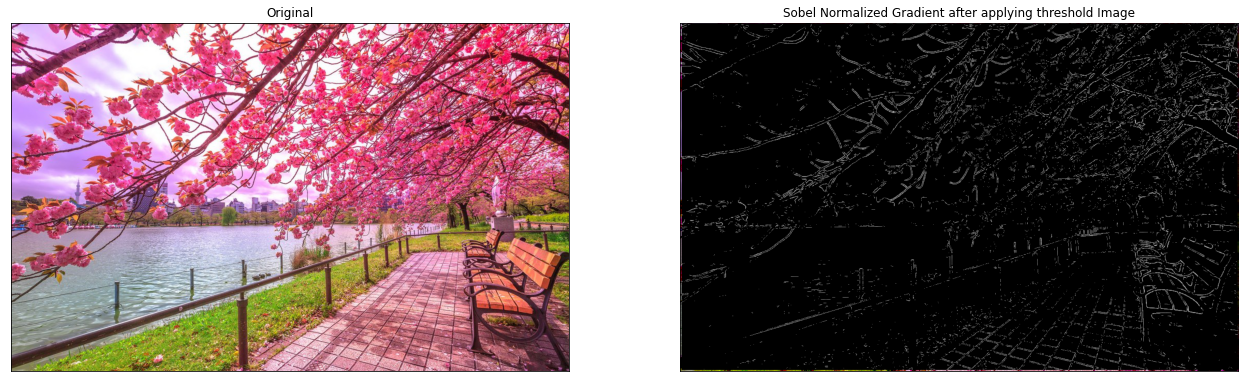

In [42]:
img = plt.imread('place.jpg')
# print(img)

x_filter = [[1,0,-1], [2,0,-2], [1,0,-1]]

y_filter = [[1,2,1], [0,0,0], [-1,-2,-1]]

new_img = img.copy()

n, m, d = img.shape
# print(n, m)

for i in range(3, n - 2):
  # print(i)
  for j in range(3, m - 2):
    # 3x3 matrix
    matrix = img[i-1:i+2,j-1:j+2,0]
    dy_temp = two_dimensional_convolution(matrix, y_filter)
    dy=dy_temp.sum() / 9

    dx_temp = two_dimensional_convolution(matrix, x_filter)
    dx = dx_temp.sum() / 9

    val = math.sqrt(dx*dx + dy * dy)
    
    new_img[i,j] = val

threshold = 100
new_img = np.where(new_img < threshold, 0, new_img)

new_img = new_img / new_img.max()
# plt.imshow(new_img)
# plt.show()
plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_img)
plt.title("Sobel Normalized Gradient after applying threshold Image")
plt.xticks([])
plt.yticks([])
plt.show()